This jupyter lab showcases the **nonlinear** ICP package. Lab [Linear Invariant Causal Prediction Using Employment Data From The Work Bank](https://notes.quantecon.org/submission/5e851bfecc00b7001acde469) shows the **linear** Invariant Causal Prediction (ICP) package. Both labs are self contained so you can read one lab only or both in any order.

# Nonlinear Invariant Causal Prediction Using Unemployment Data and Inflation Adjusted Prices from the United States Bureau of Labor Statistics

By Clarman Cruz

April, 2020

Correlation does not imply causation.  Here is a funny one. "The classic example of correlation not equaling causation can be found with ice cream and -- murder. That is, the rates of violent crime and murder have been known to jump when ice cream sales do. But, presumably, buying ice cream doesn't turn you into a killer (unless they're out of your favorite kind?)."

[Wiki](https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation) defines it as "the inability to legitimately deduce a cause-and-effect relationship between two variables solely on the basis of an observed association or correlation between them.[1]The idea that "correlation implies causation" is an example of a questionable-cause logical fallacy, in which two events occurring together are taken to have established a cause-and-effect relationship. This fallacy is also known by the Latin phrase cum hoc ergo propter hoc ("with this, therefore because of this")."  

A number of researchers have pointed out the limitations of the classical machine learning models for casual interference.  Some examples from the literature follow.

*  [Beyond prediction: Using big data for policy problems](https://science.sciencemag.org/content/355/6324/483) (2017) says that "Off-the-shelf applications of SML techniques are designed to answer the following type of question: If an analyst is told that on a particular day, prices were unusually high, what is the best prediction of occupancy on that day? The correct answer is that occupancy is likely to be high. By contrast, the question of the effect of changing the pricing policy is a causal question, and common experience indicates that if the firm implemented a new policy to systematically raise prices by 5% everywhere, it would be unlikely to sell more hotel rooms." 

* [From Dependency to Causality: A Machine Learning Approach](https://arxiv.org/abs/1412.6285) (2014) explains that "the unidirectional link between these two notions (correlation and causation) has been used by many formal approaches to causality to justify the adoption of statistical methods for detecting or inferring causal links from observational data. The most inuential one is the Causal Bayesian Network approach, detailed in Koller and Friedman, 2009 which relies on notions of independence and conditional independence to detect causal patterns in the data."
 
*  [Causal inference by using invariant prediction: identification and confidence intervals](https://arxiv.org/abs/1501.01332) (2016) asks "what is the difference between a prediction that is made with a causal model and that with a non-causal model? Suppose that we intervene on the predictor variables or change the whole environment. The predictions from a causal model will in general work as well under interventions as for observational data. In contrast, predictions from a non-causal model can potentially be very wrong if we actively intervene on variables."

*  [Invariant Causal Prediction for Nonlinear Models](https://arxiv.org/abs/1706.08576) (2018) points out that "classical prediction models, however, do not answer whether an active intervention on some of the covariates leads to a change in the [observed system]. This can only be answered by exploiting causal knowledge of the system."


## The Nonlinear Invariant Causal Prediction Package

Some researchers have defined causal inference in mathematical form.  The task is not easy.  The authors of [Causal inference by using invariant prediction: identification and confidence intervals](https://arxiv.org/abs/1501.01332) not only define a rigorous mathematical model for causal inference but also create a predictive model on top of it.  It is a supervised machine learning model.  They describe their beautiful mathematics in their paper.  To very briefly summarize their approach, the authors "use the invariance of the causal relationships under different settings e ∈ **E** (Environment set) for statistical estimation, which opens a new road for causal discovery and inference.  For simplicity, we shall mostly focus on a linear model with a target or response variable and various predictor variables, where expression (1) is unchanged and expression (2) then reads **Y**e= μ + **X**e **V** + error, with μ a constant intercept term." **V** is a vector relating to the predictors computed by the machine learning model.  

The authors of the paper implemented their machine learning model in a R package named [InvariantCausalPrediction](https://cran.r-project.org/web/packages/InvariantCausalPrediction/index.html) (ICP). It is a great package allowing us to do both.  One is to find causality between the target variable and the predictors of the dataset. And two, one is able to predict using some of the dataset variables.  One easily defines two (or more) environments within the dataset. One environment is before and the second environment is after the experiment or intervention or treatment.  The idea is that predictors are associated with environments.  Casual interference logic is guided by the different environments.  This is awesome because in many applications as in economics one is not able to precisely define a control group and treatment group to conduct an experiment.  Often, one must use historical data to study casual interference without modifying the observed economical system.  


The Invariant Causal Prediction package R package is computationally expensive.  It works better in small datasets that are very clean. The ICP algorithm has limitations. The authors later published paper [Invariant Causal Prediction for Nonlinear Models](https://arxiv.org/abs/1706.08576) (2018) extending the model to handle better non linear datasets. Many real world dataset are not linear.  The second paper also considers environments that are not discrete but continuous.  The nonlinear version handles more predictors that ICP. 

The nonlinearICP paper includes some fascinating mathematics involving probability, graphs, trees, and random forest. The task is complex.  Briefly, let the predictors be set **P** containing {p1, p2, ... pp}.  The nonlinear ICP model lists all subsets of set **P**.  Then, it computes the average causal effects for each subset within the confidence level. Then, a few of the subsets are accepted as good candidates of causality for target variable **Y**.  Let set element *pi* be a casual predictor found in each accepted subset.  Then, *pi* it is an invariant causal predictor of the target variable **Y**.  Other high level concepts of nonlinear IPC model are:

* Use of nonlinear and nonparametric empirical evaluation of conditional independence tests
* "if we know that the parental set of a variable **Y** is either S = {1, 3} or S = {2, 3}, we know that {3} has to be a parent of Y. Yet we also want to explore the information that one variable out of the set {1, 2} also has to be causal for the target variable Y , even if we do not know which one out of the two."
* Use of nonparametric or nonlinear confidence bands for the strength of the causal effects

Try not to include many predictors since there are 2^p subsets unless you have computer and memory resources for it.  One can use the *maxSizeSets* argument to the nonlinearIPC function to reduce the number of subsets.  I am writing this lab in a four years old Lenovo Win10 ThinkPad.

The purpose of this lab is to showcase, in [Julia](https://julialang.org) 1.4.0, the [nonlinearICP](https://cran.r-project.org/web/packages/nonlinearICP/index.html) R package accompanying the the nonlinear ICP paper. The main steps to use the InvariantCausalPrediction package are the same to use the nonlinear ICP package:  

1. Define a matrix **X** containing rows as observations and columns as predictors.  No missing values are allowed in the package

2. Define the two of environments or experimental settings **E**1, and **E**2

3. Assign each row to an environment **E**i

4. Define the answer to the prediction, **Y**.  That is, the target values used to train the supervised model

5. Call function nonlinearICP(X,Y,E)  along any other input arguments

6. Review the model results

In [1]:
using RCall, Queryverse, DataFrames, CSV, Suppressor, Statistics
@rlibrary nonlinearICP


R version 3.6.1 (2019-07-05) -- "Action of the Toes"
Copyright (C) 2019 The R Foundation for Statistical Computing
Platform: x86_64-w64-mingw32/x64 (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.



## Unemployment Dataset

This jupyter lab uses real unemployment data from [United States Bureau of Labor Statistics](https://beta.bls.gov/labs/).  The unemployment rate is by quarter.  

In [2]:
fileName = "C:\\Users\\drcxcruz\\Documents\\Julia\\nonlinearICP\\SesonalityUmemploymentRateSince1970.csv"
dfUmemploymentFile = CSV.File(fileName; normalizenames=true) |> DataFrame

,Series_ID,Year,Period,Label,Value
,String,Int64,String,String,Float64
1,LNS14000000,1970,M01,1970 Jan,3.9
2,LNS14000000,1970,M02,1970 Feb,4.2
3,LNS14000000,1970,M03,1970 Mar,4.4
4,LNS14000000,1970,M04,1970 Apr,4.6
5,LNS14000000,1970,M05,1970 May,4.8
6,LNS14000000,1970,M06,1970 Jun,4.9
7,LNS14000000,1970,M07,1970 Jul,5.0
8,LNS14000000,1970,M08,1970 Aug,5.1
9,LNS14000000,1970,M09,1970 Sep,5.4


We like to give the machine learning model different kinds of time series.  Therefore, we must normalize each time series. The result of normalization is to scale the original values to a range between 0 and 1. The normalise logic is also found in lab [A Data Science Example In Julia Using Education Statistics From The Work Bank](https://notes.quantecon.org/submission/5e49753efe86cc001a911eef)

In [3]:
function normalizer(v)
  fMax = partialsort(v,1,rev=true) 
  fMin = partialsort(v,1,rev=false) 
  if ismissing(fMax - fMin)    
      n = Vector{Union{Missing, Float64}}(missing, length(v))
  elseif (fMax - fMin) == 0
      n = v
  else 
      n = (v .- fMin) ./ (fMax - fMin)
  end
  return n
end

v = [1,2,3]
normalizer(v)

3-element Array{Float64,1}:
 0.0
 0.5
 1.0

Let us compute the unemployment rate by year and then normalize it.  

In [4]:
dfUmemployment = dfUmemploymentFile |>
            @groupby(_.Year) |>
            @map({
                  Year=key(_),
                  Rate=mean(_.Value)
                }) |>
            @orderby(_.Year) |>
            DataFrame

dfUmemployment[!,:RateNormUnemployment] .= normalizer(dfUmemployment[!,:Rate])

dfUmemployment

,Year,Rate,RateNormUnemployment
,Int64,Float64,Float64
1,1970,4.98333,0.217931
2,1971,5.95,0.377931
3,1972,5.6,0.32
4,1973,4.85833,0.197241
5,1974,5.64167,0.326897
6,1975,8.475,0.795862
7,1976,7.7,0.667586
8,1977,7.05,0.56
9,1978,6.06667,0.397241


## Inflation Adjusted Prices

This jupyter lab uses real [Inflation Rates Pricing](https://www.in2013dollars.com/inflation-cpi-categories).  The prices are computed with the United States Bureau of Labor Statistics. We back filled the college tuition data from 1977 to 1970 to make all time series from 1970 to 2019.  We like to check if low housing resulted in increased employment rates in the United States.  The [S&P 500 Index](https://www.officialdata.org/us-economy/s-p-500-price-inflation-adjusted) is included in the analysis to see the effect of the stock market.

In [5]:
fileName = "C:\\Users\\drcxcruz\\Documents\\Julia\\nonlinearICP\\PriceInflationforMedicalCareServicesSince1970.txt"
dfMedicalCareServices = CSV.File(fileName; normalizenames=true, delim='\t', decimal='.') |> DataFrame
dfMedicalCareServices[!,:USD_Value] .= replace.(dfMedicalCareServices[!,:USD_Value], "\$" => "")
dfMedicalCareServices[!,:USD_Value] .= parse.( Float64, replace.(dfMedicalCareServices[!,:USD_Value], "," => ""))
rename!(dfMedicalCareServices, [:YearMed,:USDvalueMed,:RateMed])
dfMedicalCareServices[!,:ValueNormMed] .= normalizer(dfMedicalCareServices[!,:USDvalueMed])

dfMedicalCareServices

,YearMed,USDvalueMed,RateMed,ValueNormMed
,Int64,Float64,String,Float64
1,1970,1000.0,6.40%,0.0
2,1971,1064.05,6.40%,0.00468291
3,1972,1099.14,3.30%,0.00724845
4,1973,1141.35,3.84%,0.0103346
5,1974,1247.61,9.31%,0.0181036
6,1975,1398.53,12.10%,0.0291378
7,1976,1531.29,9.49%,0.0388444
8,1977,1677.79,9.57%,0.0495555
9,1978,1818.4,8.38%,0.0598359


In [6]:
fileName = "C:\\Users\\drcxcruz\\Documents\\Julia\\nonlinearICP\\PriceInflationforCollegeTuitionAndFeesSince1977.txt"
dfCollegeTuition = CSV.File(fileName; normalizenames=true, delim='\t', decimal='.') |> DataFrame
dfCollegeTuition[!,:USD_Value] .= replace.(dfCollegeTuition[!,:USD_Value], "\$" => "")
dfCollegeTuition[!,:USD_Value] .= parse.( Float64, replace.(dfCollegeTuition[!,:USD_Value], "," => ""))
rename!(dfCollegeTuition, [:YearCollege,:USDvalueCollege,:RateCollege])
dfCollegeTuition[!,:ValueNormCollege] .= normalizer(dfCollegeTuition[!,:USDvalueCollege])

dfCollegeTuition

,YearCollege,USDvalueCollege,RateCollege,ValueNormCollege
,Int64,Float64,String,Float64
1,1970,20000.0,-,0.0
2,1971,20000.0,-,0.0
3,1972,20000.0,-,0.0
4,1973,20000.0,-,0.0
5,1974,20000.0,-,0.0
6,1975,20000.0,-,0.0
7,1976,20000.0,-,0.0
8,1977,20000.0,-,0.0
9,1978,20693.5,3.47%,0.00248644


In [7]:
fileName = "C:\\Users\\drcxcruz\\Documents\\Julia\\nonlinearICP\\PriceInflationOfHousingSince1970.txt"
dfHousing = CSV.File(fileName; normalizenames=true, delim='\t', decimal='.') |> DataFrame
dfHousing[!,:USD_Value] .= replace.(dfHousing[!,:USD_Value], "\$" => "")
dfHousing[!,:USD_Value] .= parse.( Float64, replace.(dfHousing[!,:USD_Value], "," => ""))
rename!(dfHousing, [:YearHousing,:USDvalueHousing,:RateHousing])
dfHousing[!,:ValueNormHousing] .= normalizer(dfHousing[!,:USDvalueHousing])

dfHousing

,YearHousing,USDvalueHousing,RateHousing,ValueNormHousing
,Int64,Float64,String,Float64
1,1970,100000.0,6.93%,0.0
2,1971,104445.0,4.45%,0.00704174
3,1972,108501.0,3.88%,0.0134664
4,1973,113222.0,4.35%,0.0209437
5,1974,125940.0,11.23%,0.041089
6,1975,139230.0,10.55%,0.0621416
7,1976,147777.0,6.14%,0.0756806
8,1977,157860.0,6.82%,0.0916516
9,1978,171677.0,8.75%,0.113539


In [8]:
fileName = "C:\\Users\\drcxcruz\\Documents\\Julia\\nonlinearICP\\PriceInflationOfCarsSince1970.txt"
dfCars = CSV.File(fileName; normalizenames=true, delim='\t', decimal='.') |> DataFrame
dfCars[!,:USD_Value] .= replace.(dfCars[!,:USD_Value], "\$" => "")
dfCars[!,:USD_Value] .= replace.(dfCars[!,:USD_Value], "\$" => "")
dfCars[!,:USD_Value] .= parse.( Float64, replace.(dfCars[!,:USD_Value], "," => ""))
rename!(dfCars, [:YearCars,:USDvalueCars,:RateCars])
dfCars[!,:ValueNormCars] .= normalizer(dfCars[!,:USDvalueCars])

dfCars

,YearCars,USDvalueCars,RateCars,ValueNormCars
,Int64,Float64,String,Float64
1,1970,15000.0,3.11%,0.0
2,1971,15607.8,4.05%,0.0234032
3,1972,15475.9,-0.85%,0.0183234
4,1973,15480.6,0.03%,0.0185048
5,1974,16378.2,5.80%,0.0530655
6,1975,17784.7,8.59%,0.10722
7,1976,18910.8,6.33%,0.150579
8,1977,19914.4,5.31%,0.189222
9,1978,21429.2,7.61%,0.247548


In [9]:
fileName = "C:\\Users\\drcxcruz\\Documents\\Julia\\nonlinearICP\\PriceInflationForBananasSince1970.txt"
dfBananas = CSV.File(fileName; normalizenames=true, delim='\t', decimal='.') |> DataFrame
dfBananas[!,:USD_Value] .= replace.(dfBananas[!,:USD_Value], "\$" => "")
dfBananas[!,:USD_Value] .= replace.(dfBananas[!,:USD_Value], "\$" => "")
dfBananas[!,:USD_Value] .= parse.( Float64, replace.(dfBananas[!,:USD_Value], "," => ""))
rename!(dfBananas, [:YearBananas,:USDvalueBananas,:RateBananas])
dfBananas[!,:ValueNormBananas] .= normalizer(dfBananas[!,:USDvalueBananas])

dfBananas

,YearBananas,USDvalueBananas,RateBananas,ValueNormBananas
,Int64,Float64,String,Float64
1,1970,3.5,0.14%,0.0130548
2,1971,3.3,-5.82%,0.0
3,1972,3.51,6.43%,0.0137076
4,1973,3.66,4.43%,0.0234987
5,1974,4.11,12.31%,0.0528721
6,1975,5.15,25.26%,0.120757
7,1976,5.22,1.33%,0.125326
8,1977,5.68,8.70%,0.155352
9,1978,6.35,11.81%,0.199086


The [S&P 500 Index](https://www.officialdata.org/us-economy/s-p-500-price-inflation-adjusted) prices are inflation adjusted also.  

In [10]:
fileName = "C:\\Users\\drcxcruz\\Documents\\Julia\\nonlinearICP\\SPXSince1970.csv"
dfSPX = CSV.File(fileName; normalizenames=true) |> DataFrame
rename!(dfSPX, [:YearSPX,:USDvalueSPX,:ChangeSPX,:RateSPX])
dfSPX[!,:USDvalueSPX] .= parse.( Float64, replace.(dfSPX[!,:USDvalueSPX], "," => ""))
dfSPX[!,:ValueNormSPX] .= normalizer(dfSPX[!,:USDvalueSPX])

dfSPX

,YearSPX,USDvalueSPX,ChangeSPX,RateSPX,ValueNormSPX
,Int64,Float64,Float64,Float64,Float64
1,1970,613.53,-122.24,-16.61,0.114396
2,1971,603.22,-10.31,-1.68,0.110385
3,1972,645.43,42.21,7.0,0.126804
4,1973,713.73,68.3,10.58,0.15337
5,1974,529.63,-184.1,-25.79,0.0817613
6,1975,357.64,-171.99,-32.47,0.0148625
7,1976,447.37,89.72,25.09,0.0497647
8,1977,455.65,8.29,1.85,0.0529853
9,1978,370.82,-84.84,-18.62,0.0199891


## Combining the Datasets

For simplicity, let us make one single table with all the datasets.  Notice that each dataset is ordered by year.

In [11]:
dfCombine = copy(dfUmemployment)

for c in names(dfMedicalCareServices)
    dfCombine[!,c] = dfMedicalCareServices[!,c]
end
for c in names(dfCollegeTuition)
    dfCombine[!,c] = dfCollegeTuition[!,c]
end
for c in names(dfHousing)
    dfCombine[!,c] = dfHousing[!,c]
end
for c in names(dfCars)
    dfCombine[!,c] = dfCars[!,c]
end
for c in names(dfBananas)
    dfCombine[!,c] = dfBananas[!,c]
end
for c in names(dfSPX)
    dfCombine[!,c] = dfSPX[!,c]
end

select!(dfCombine, Not([:RateMed,:RateCollege,:RateHousing,:RateCars]))

dfCombine |> @filter(_.Year >= 1970)

Year,Rate,RateNormUnemployment,YearMed,USDvalueMed,ValueNormMed,YearCollege,USDvalueCollege,ValueNormCollege,YearHousing,USDvalueHousing,ValueNormHousing,YearCars,USDvalueCars,ValueNormCars,YearBananas,USDvalueBananas,RateBananas,ValueNormBananas,YearSPX,USDvalueSPX,ChangeSPX,RateSPX,ValueNormSPX
1970,4.98333,0.217931,1970,1000.0,0.0,1970,20000.0,0.0,1970,100000.0,0.0,1970,15000.0,0.0,1970,3.5,"""0.14%""",0.0130548,1970,613.53,-122.24,-16.61,0.114396
1971,5.95,0.377931,1971,1064.05,0.00468291,1971,20000.0,0.0,1971,104445.0,0.00704174,1971,15607.8,0.0234032,1971,3.3,"""-5.82%""",0.0,1971,603.22,-10.31,-1.68,0.110385
1972,5.6,0.32,1972,1099.14,0.00724845,1972,20000.0,0.0,1972,108501.0,0.0134664,1972,15475.9,0.0183234,1972,3.51,"""6.43%""",0.0137076,1972,645.43,42.21,7.0,0.126804
1973,4.85833,0.197241,1973,1141.35,0.0103346,1973,20000.0,0.0,1973,113222.0,0.0209437,1973,15480.6,0.0185048,1973,3.66,"""4.43%""",0.0234987,1973,713.73,68.3,10.58,0.15337
1974,5.64167,0.326897,1974,1247.61,0.0181036,1974,20000.0,0.0,1974,125940.0,0.041089,1974,16378.2,0.0530655,1974,4.11,"""12.31%""",0.0528721,1974,529.63,-184.1,-25.79,0.0817613
1975,8.475,0.795862,1975,1398.53,0.0291378,1975,20000.0,0.0,1975,139230.0,0.0621416,1975,17784.7,0.10722,1975,5.15,"""25.26%""",0.120757,1975,357.64,-171.99,-32.47,0.0148625
1976,7.7,0.667586,1976,1531.29,0.0388444,1976,20000.0,0.0,1976,147777.0,0.0756806,1976,18910.8,0.150579,1976,5.22,"""1.33%""",0.125326,1976,447.37,89.72,25.09,0.0497647
1977,7.05,0.56,1977,1677.79,0.0495555,1977,20000.0,0.0,1977,157860.0,0.0916516,1977,19914.4,0.189222,1977,5.68,"""8.70%""",0.155352,1977,455.65,8.29,1.85,0.0529853
1978,6.06667,0.397241,1978,1818.4,0.0598359,1978,20693.5,0.00248644,1978,171677.0,0.113539,1978,21429.2,0.247548,1978,6.35,"""11.81%""",0.199086,1978,370.82,-84.84,-18.62,0.0199891
1979,5.85,0.361379,1979,1986.99,0.0721621,1979,22338.2,0.00838343,1979,192621.0,0.146715,1979,23130.2,0.313041,1979,7.17,"""12.93%""",0.252611,1979,374.9,4.08,1.1,0.0215761


## Defining the Invariant Causal Prediction Model

Now, we are ready to run the Nonlinear Invariant Causal Prediction model.  We need to create **X** which is the observations, **Y** which is the learning target, and **E** are the environment assignments.  Here, we set a new environment in 2008 when the financial crisis occured in the United States. Year 2008 is the intervention or experiment point. Observations after 2008 are post intervention or treatment.   

In [12]:
insertcols!(dfCombine, 1, Environment=[y >= 2008 ? 2 : 1 for y in dfCombine.Year])
categorical!(dfCombine, [:Environment])

dfCombine |> @filter(_.Year >= 1970)

Environment,Year,Rate,RateNormUnemployment,YearMed,USDvalueMed,ValueNormMed,YearCollege,USDvalueCollege,ValueNormCollege,YearHousing,USDvalueHousing,ValueNormHousing,YearCars,USDvalueCars,ValueNormCars,YearBananas,USDvalueBananas,RateBananas,ValueNormBananas,YearSPX,USDvalueSPX,ChangeSPX,RateSPX,ValueNormSPX
"CategoricalValue{Int64,UInt32} 1",1970,4.98333,0.217931,1970,1000.0,0.0,1970,20000.0,0.0,1970,100000.0,0.0,1970,15000.0,0.0,1970,3.5,"""0.14%""",0.0130548,1970,613.53,-122.24,-16.61,0.114396
"CategoricalValue{Int64,UInt32} 1",1971,5.95,0.377931,1971,1064.05,0.00468291,1971,20000.0,0.0,1971,104445.0,0.00704174,1971,15607.8,0.0234032,1971,3.3,"""-5.82%""",0.0,1971,603.22,-10.31,-1.68,0.110385
"CategoricalValue{Int64,UInt32} 1",1972,5.6,0.32,1972,1099.14,0.00724845,1972,20000.0,0.0,1972,108501.0,0.0134664,1972,15475.9,0.0183234,1972,3.51,"""6.43%""",0.0137076,1972,645.43,42.21,7.0,0.126804
"CategoricalValue{Int64,UInt32} 1",1973,4.85833,0.197241,1973,1141.35,0.0103346,1973,20000.0,0.0,1973,113222.0,0.0209437,1973,15480.6,0.0185048,1973,3.66,"""4.43%""",0.0234987,1973,713.73,68.3,10.58,0.15337
"CategoricalValue{Int64,UInt32} 1",1974,5.64167,0.326897,1974,1247.61,0.0181036,1974,20000.0,0.0,1974,125940.0,0.041089,1974,16378.2,0.0530655,1974,4.11,"""12.31%""",0.0528721,1974,529.63,-184.1,-25.79,0.0817613
"CategoricalValue{Int64,UInt32} 1",1975,8.475,0.795862,1975,1398.53,0.0291378,1975,20000.0,0.0,1975,139230.0,0.0621416,1975,17784.7,0.10722,1975,5.15,"""25.26%""",0.120757,1975,357.64,-171.99,-32.47,0.0148625
"CategoricalValue{Int64,UInt32} 1",1976,7.7,0.667586,1976,1531.29,0.0388444,1976,20000.0,0.0,1976,147777.0,0.0756806,1976,18910.8,0.150579,1976,5.22,"""1.33%""",0.125326,1976,447.37,89.72,25.09,0.0497647
"CategoricalValue{Int64,UInt32} 1",1977,7.05,0.56,1977,1677.79,0.0495555,1977,20000.0,0.0,1977,157860.0,0.0916516,1977,19914.4,0.189222,1977,5.68,"""8.70%""",0.155352,1977,455.65,8.29,1.85,0.0529853
"CategoricalValue{Int64,UInt32} 1",1978,6.06667,0.397241,1978,1818.4,0.0598359,1978,20693.5,0.00248644,1978,171677.0,0.113539,1978,21429.2,0.247548,1978,6.35,"""11.81%""",0.199086,1978,370.82,-84.84,-18.62,0.0199891
"CategoricalValue{Int64,UInt32} 1",1979,5.85,0.361379,1979,1986.99,0.0721621,1979,22338.2,0.00838343,1979,192621.0,0.146715,1979,23130.2,0.313041,1979,7.17,"""12.93%""",0.252611,1979,374.9,4.08,1.1,0.0215761


## Executing the Nonlinear Invariant Causal Prediction 

We now have defined the environment, now we define **X** and **Y**.  The column *RateNormUnemployment* is our main concern and it is our **Y**.  The matrix **X** are all the columns except the **Y** and the **E**.   The input argument *alpha* defines the confidence intervals for the variables or predictors. Use the *alpha*=0.1 to obtain 90% confidence intervals.

In [13]:
E = dfCombine.Environment
Y = dfCombine.RateNormUnemployment
X = select(dfCombine, [:ValueNormCollege, :ValueNormHousing, :ValueNormCars, :ValueNormBananas, :ValueNormSPX])

icpUSA = @suppress nonlinearICP(X, Y, E, alpha = 0.10)  #maxSizeSets = 10, speedUp = true 

println( "Accepted Sets\n", icpUSA["acceptedSets"]) 
println( "Retrieved Causal Variables\n", icpUSA["retrievedCausalVars"]) 
println( "pvalues.accepted\n", icpUSA["pvalues.accepted"]) 
println( "Defining sets \n", icpUSA["definingSets"])


Accepted Sets
RObject{VecSxp}
[[1]]
[1] 2

[[2]]
[1] 1 2

[[3]]
[1] 1 3

[[4]]
[1] 1 4

[[5]]
[1] 4 5


Retrieved Causal Variables
RObject{IntSxp}
integer(0)

pvalues.accepted
RObject{RealSxp}
[1] 0.5287159 0.3342816 0.9893191 0.2140740 1.0446330

Defining sets 
RObject{VecSxp}
[[1]]
[1] 1 2 4

[[2]]
[1] 1 2 5

[[3]]
[1] 2 3 4




## Discussing the Results of the NonLinear Invariant Causal Prediction 

Here, we like to see what variables caused the higher unemployment numbers between 2008 and 2010. We know that the housing market resulted in a financial recession in the United States.  It is reasonable to expect that variable *ValueNormHousing* caused higher unemployment numbers between 2008 and 2010.  The unemployment rate is the target **Y** while the inflation adjusted prices are matrix **X**.  

In the lab, none of the variables are strongly representing any casualty of the target **Y**, within the 90% confidence.  There is not a variable found in each of the accepted sets generated by the nonlinearICP package.  But not all is lost.  There are defining sets to look at.  A defining set implies that at least one of its members is in fact a casual predictor to target **Y**.  We just do not know which member it is.  It is helpful to study all the defining sets.  One could obtain the interaction of all defining sets. The interaction of the defining sets are variables that more likely represent casualty of the target **Y**.

We used our favorite graphing Julia package [VegaLite](https://www.queryverse.org/VegaLite.jl/stable) to graph the intersection of the defining sets.  The graphs show that *ValueNormHousing* is very likely to represent casualty of the target **Y**. 

In [14]:
inter = Set([i for i in 1:ncol(X)])
for s in icpUSA["definingSets"]
    inter = intersect(Set(s), inter)
end
println("Defining Sets Interception: ", inter)

Defining Sets Interception: Set([2.0])


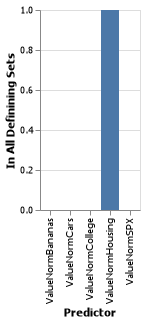

In [15]:
xAxis = [String(n) for n in names(X)]
yAxis = [n in inter ? 1 : 0 for n in 1:ncol(X)]
@vlplot(:bar, 
    y={yAxis, axis={title="In All Definining Sets"}},
    x={xAxis, axis={title="Predictor"}}
)

Let us graph the defining sets in a bubble plot.

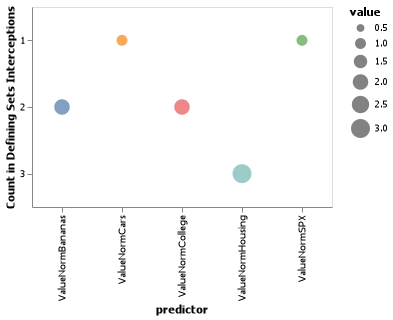

In [16]:
hash = Dict{Int64,Int64}()
for s in icpUSA["definingSets"]
  for e in collect(s)
        if haskey(hash, Int(e))
            hash[Int(e)] += 1
        else
          hash[Int(e)] = 1
        end 
    end
end

dfGraph = DataFrames.stack(DataFrame(hash), 1:ncol(X)) |> @orderby(_.variable) |> DataFrame
dfGraph.predictor = [String(n) for n in names(X)]

dfGraph|> 
@vlplot(
    :circle,
    width=300, 
    height=200,
    color={ "predictor:n", legend=nothing},
    y={"value:o", axis={title="Count in Defining Sets Interceptions"}},
    x="predictor:o",
    size=:value
)

## Bananas:  'A Causing B' Does Not Mean 'B Causing A'

Be very careful when deciding what are the appropriate target **Y** and the variables in **X** before running the ICP model.  Next, we switch target **Y** from *RateNormUnemployment* to *ValueNormHousing*.  And, we forget to add *ValueNormSPX*.   The result is that the banana pricing caused housing problems in the United States.  Variable 4 is *ValueNormBananas* and it is found in all accepted sets. Thus, the Retrieved Causal Variables set generated by the nonlinear ICP package includes 4. And according to the model, this is so with "90% confidence". 

In [17]:
E = dfCombine.Environment
Y = dfCombine.ValueNormHousing
X = select(dfCombine, [:ValueNormCollege, :RateNormUnemployment, :ValueNormCars, :ValueNormBananas])

icpUSA = @suppress nonlinearICP(X, Y, E, alpha = 0.10) 

println( "Accepted Sets\n", icpUSA["acceptedSets"]) 
println( "Retrieved Causal Variables\n", icpUSA["retrievedCausalVars"]) 

Accepted Sets
RObject{VecSxp}
[[1]]
[1] 4

[[2]]
[1] 1 4


Retrieved Causal Variables
RObject{IntSxp}
[1] 4



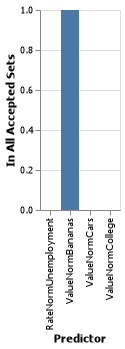

In [18]:
xAxis = [String(n) for n in names(X)]
yAxis = [n in icpUSA["retrievedCausalVars"] ? 1 : 0 for n in 1:ncol(X)]
@vlplot(:bar, 
    y={yAxis, axis={title="In All Accepted Sets"}},
    x={xAxis, axis={title="Predictor"}}
)

## Conclusion

Correlation does not imply causation.  The purpose of this jupyter lab is to encourage conversation about how and why classical machine learning models do not handle casual interference.  The authors of [Invariant Causal Prediction for Nonlinear Models](https://arxiv.org/abs/1706.08576) (2018) not only define a sophisticated mathematical model for causal inference but also create a predictive model on top of it.  The paper's authors implemented their machine learning model in a R package named  [nonlinearICP](https://cran.r-project.org/web/packages/nonlinearICP/index.html).  The Nonlinear Invariant Causal Prediction is an interesting package.  One is able to find causality between the target variable and the predictors of the dataset. The lab shows the Nonlinear Invariant Causal Prediction package in [Julia](https://julialang.org) 1.4.0. along [VegaLite](https://www.queryverse.org/VegaLite.jl/stable) plots of the model results.  The real dataset is from [United States Bureau of Labor Statistics](https://beta.bls.gov/labs/).  The [S&P 500 Index](https://www.officialdata.org/us-economy/s-p-500-price-inflation-adjusted) prices are inflation adjusted also.  

It is a challenge to create such causal inference modeling.   It requires new ways of thinking and advanced mathematics. The computation is expensive in time and/or memory.  One must be very careful defining the target and the predictors of the model. That is some of the reasons casual interference is missing from many popular machine learning libraries such as Python’s Scikit-learn. 


# About the Author

Clarman Cruz completed his BS/MS in Computer Science from State University of New York at Stony Brook/Albany. He has more than 15 years technology experience in the banking industry.  He plans to start in 2020 his Master of Data Science from [Central Connecticut State University](https://www2.ccsu.edu/program/DataScience_MS]).
